# Task 1:

### Column Details 


Survival:

    1- yes
    2- no
Pclass:
    
    1- First
    2- Second
    3- Third
    
Sex:

    Male
    Female
   
Age:

    Age in year
    
Sibling:

    Number of siblings / spouses aboard the Titanic
    
parch:

    Number of parents / children aboard the Titanic
    
Ticket:
    
    Ticket number
    
Fare:

    Passenger fare
    
Cabin: 

    Cabin number
    
embarked:

    Port of Embarkation
    C = Cherbourg
    Q = Queenstown
    S = Southampton
    

#### Data is spleated into training and testing form 
#### Combining both dataframes to create master dataframe

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [32]:
df_t_result = pd.read_csv("gender_submission.csv") 
# df.head()

In [33]:
df_train = pd.read_csv("train.csv")
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [34]:
df_test = pd.read_csv("test.csv")
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [35]:
df = df_test.merge(df_t_result, on ='PassengerId', right_index = True)
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [36]:
df = pd.concat([df,df_train],axis = 0)
df.shape

(1309, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 107.4+ KB


In [38]:
df.duplicated().sum()

0

    No duplicate records are present

In [39]:
# missing values
round(df.isna().sum()/len(df) * 100,2)

Age            20.09
Cabin          77.46
Embarked        0.15
Fare            0.08
Name            0.00
Parch           0.00
PassengerId     0.00
Pclass          0.00
Sex             0.00
SibSp           0.00
Survived        0.00
Ticket          0.00
dtype: float64

    Cabin column has 77% missing values, hence droping Cabin column

In [40]:
df.drop(columns = ['Cabin','PassengerId'],inplace = True)

#### Importing missing values for Age column

In [41]:
# Checking missing values as per the passenger class
df_age_null = df[df.isna()['Age']]
df_age_null.groupby("Pclass").Pclass.count()

Pclass
1     39
2     16
3    208
Name: Pclass, dtype: int64

    Median of each class

In [42]:
df.groupby('Pclass').Age.agg(['count','max','median'])

,count,max,median
Pclass,,,
1,284,80.0,39.0
2,261,70.0,29.0
3,501,74.0,24.0


    Replacing missing values using the respected medians of each Passenger class

In [43]:
df.loc[((df['Pclass']==1) & (~df["Age"].notnull())),'Age'] = 39
df.loc[((df['Pclass']==2) & (~df["Age"].notnull())),'Age'] = 29
df.loc[((df['Pclass']==3) & (~df["Age"].notnull())),'Age'] = 24

print("missing values : ",df['Age'].isna().sum())

missing values :  0


#### Importing missing values for Embarked column

In [44]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [45]:
df['Embarked'].mode()

0    S
dtype: object

In [46]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("missing values : ",df['Embarked'].isna().sum())

missing values :  0


#### Fare column has only 0.08% missing observations, hence droping those rows

In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

Age         0
Embarked    0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
Ticket      0
dtype: int64

# Outliers

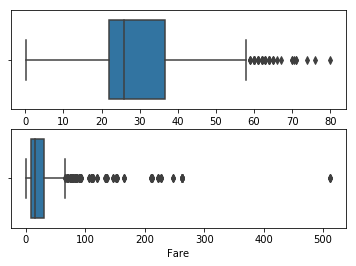

In [49]:
plt.subplot(2,1,1)
sns.boxplot(df['Age']);

plt.subplot(2,1,2)
sns.boxplot(df['Fare']);


In [50]:
df[['Age','Fare']].describe()

,Age,Fare
count,1308.000000,1308.000000
mean,29.183616,33.295479
std,13.148939,51.758668
min,0.170000,0.000000
25%,22.000000,7.895800
50%,26.000000,14.454200
75%,36.625000,31.275000
max,80.000000,512.329200


#### Replacing outliers with IQR

In [51]:
# Fare
Q1= df['Fare'].quantile(0.25)
Q3 =df['Fare'].quantile(0.75)
IQR = Q3-Q1
print("Inter Quartile Range is : ",round(IQR,2))

LB= df['Fare'].quantile(0.25)-(1.5*IQR)
UB= df['Fare'].quantile(0.75)+(1.5*IQR)
print("lower bound of Fare : ",round(LB,2))
print("Upper bound of Fare : ",round(UB,2))

Inter Quartile Range is :  23.38
lower bound of Fare :  -27.17
Upper bound of Fare :  66.34


In [52]:
round(df.loc[df['Fare']>UB].shape[0]/len(df)*100,2)

13.07

In [53]:
df['Fare'] = df['Fare'].clip(LB,UB)

In [54]:
df['Fare'].describe()

count    1308.000000
mean       24.287208
std        20.795666
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max        66.343800
Name: Fare, dtype: float64

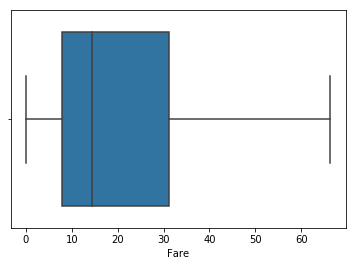

In [55]:
sns.boxplot(df['Fare'])

     Removed outliers from Fare column

In [56]:
# Age
Q1= df['Age'].quantile(0.25)
Q3 =df['Age'].quantile(0.75)
IQR = Q3-Q1
print("Inter Quartile Range is : ",round(IQR,2))

LB= df['Age'].quantile(0.25)-(1.5*IQR)
UB= df['Age'].quantile(0.75)+(1.5*IQR)
print("lower bound of Age : ",round(LB,2))
print("Upper bound of Age : ",round(UB,2))

Inter Quartile Range is :  14.62
lower bound of Age :  0.06
Upper bound of Age :  58.56


In [57]:
df['Age'] = df['Age'].clip(LB,UB)

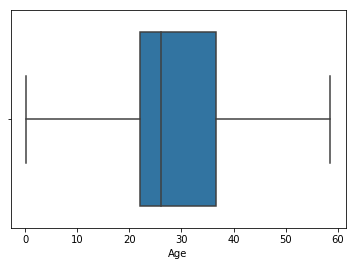

In [58]:
sns.boxplot(df['Age'])

     Removed outliers form Age column

In [59]:
df.to_csv("Titanic_modified.csv",index = False)

In [60]:
df

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,34.5000,Q,7.8292,"Kelly, Mr. James",0,3,male,0,0,330911
1,47.0000,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,3,female,1,1,363272
2,58.5625,Q,9.6875,"Myles, Mr. Thomas Francis",0,2,male,0,0,240276
3,27.0000,S,8.6625,"Wirz, Mr. Albert",0,3,male,0,0,315154
4,22.0000,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,3,female,1,1,3101298
5,14.0000,S,9.2250,"Svensson, Mr. Johan Cervin",0,3,male,0,0,7538
6,30.0000,Q,7.6292,"Connolly, Miss. Kate",0,3,female,0,1,330972
7,26.0000,S,29.0000,"Caldwell, Mr. Albert Francis",1,2,male,1,0,248738
8,18.0000,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,3,female,0,1,2657
9,21.0000,S,24.1500,"Davies, Mr. John Samuel",0,3,male,2,0,A/4 48871
